# Install and Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [ ]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

In [ ]:
ds_model = read_output_files(out_path)
ds_model_srt = ds_model.sort_values(by='PercentRemoved')
ds_model_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.751209,0.00
1,2,0.749222,0.07
2,2,0.746003,0.14
3,2,0.748043,0.21
4,2,0.748493,0.28
...,...,...,...
1296,2,0.755026,90.72
1297,2,0.753938,90.79
1298,2,0.758125,90.86
1299,2,0.753998,90.93


In [ ]:
hg_acc_rg = ds_model_srt['Accuracy'].max()
lw_acc_rg = ds_model_srt['Accuracy'].min()
base_acc_rg = ds_model_srt['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.03491790462326072
Difference between highest and base accuracy: 0.01768674045004326
Difference between lowest and base accuracy: -0.01723116417321746


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.768896,0.733978,0.751209,0.034918,0.017687,-0.017231


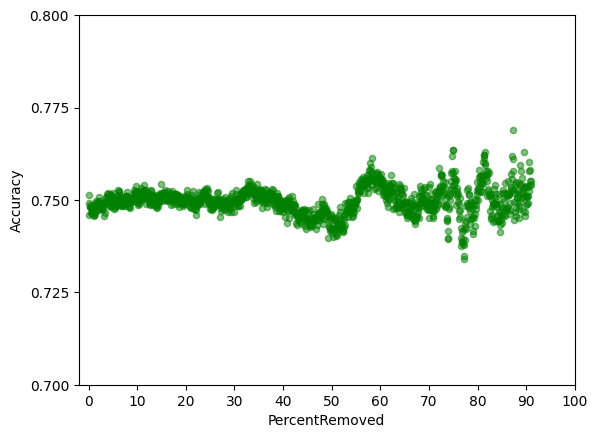

In [ ]:
ds_model_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()


# Decision Tree

In [ ]:
ds_model_dtn = read_output_files(out_path)
ds_model_dtn_srt = ds_model_dtn.sort_values(by='PercentRemoved')
ds_model_dtn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.727367,0.00
1,2,0.734491,0.07
2,2,0.732992,0.14
3,2,0.734331,0.21
4,2,0.734632,0.28
...,...,...,...
1296,2,0.751303,90.72
1297,2,0.743436,90.79
1298,2,0.734694,90.86
1299,2,0.735720,90.93


In [ ]:
hg_acc_dt = ds_model_dtn_srt['Accuracy'].max()
lw_acc_dt = ds_model_dtn_srt['Accuracy'].min()
base_acc_dt = ds_model_dtn_srt['Accuracy'].iloc[0]


acc_hl_dt = hg_acc_dt - lw_acc_dt
acc_hb_dt = hg_acc_dt - base_acc_dt
acc_lb_dt = lw_acc_dt - base_acc_dt

print("Difference between highest and lowest accuracy:", acc_hl_dt)
print("Difference between highest and base accuracy:", acc_hb_dt)
print("Difference between lowest and base accuracy:", acc_lb_dt)

dtkeyval = {
    'high_acc': [hg_acc_dt],
    'low_acc': [lw_acc_dt],
    'base_acc': [base_acc_dt],
    'diff_high_low': [acc_hl_dt],
    'diff_high_base': [acc_hb_dt],
    'diff_low_base': [acc_lb_dt]
}

dataf_dt = pd.DataFrame(dtkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.029265810296732364
Difference between highest and base accuracy: 0.023936086729881456
Difference between lowest and base accuracy: -0.005329723566850908


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.751303,0.722037,0.727367,0.029266,0.023936,-0.00533


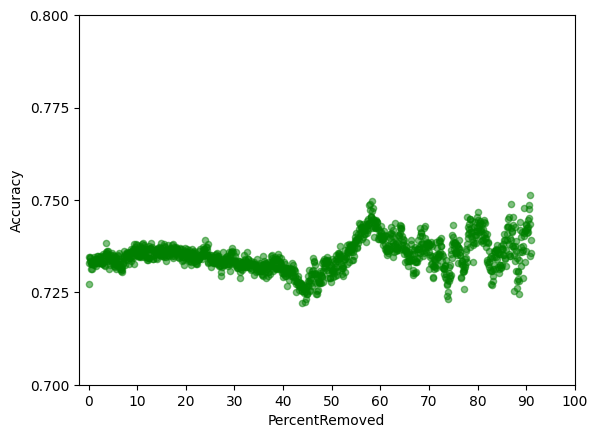

In [ ]:
ds_model_dtn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

# Bagging

In [ ]:
ds_model_bgn = read_output_files(out_path)
ds_model__bgn_srt = ds_model_bgn.sort_values(by='PercentRemoved')
ds_model__bgn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.734485,0.00
1,2,0.739747,0.07
2,2,0.735899,0.14
3,2,0.737793,0.21
4,2,0.737958,0.28
...,...,...,...
1296,2,0.742368,90.72
1297,2,0.738185,90.79
1298,2,0.736206,90.86
1299,2,0.734196,90.93


In [ ]:
hg_acc_bg = ds_model__bgn_srt['Accuracy'].max()
lw_acc_bg = ds_model__bgn_srt['Accuracy'].min()
base_acc_bg = ds_model__bgn_srt['Accuracy'].iloc[0]


acc_hl_bg = hg_acc_bg - lw_acc_bg
acc_hb_bg = hg_acc_bg - base_acc_bg
acc_lb_bg = lw_acc_bg - base_acc_bg

print("Difference between highest and lowest accuracy:", acc_hl_bg)
print("Difference between highest and base accuracy:", acc_hb_bg)
print("Difference between lowest and base accuracy:", acc_lb_bg)

bgkeyval = {
    'high_acc': [hg_acc_bg],
    'low_acc': [lw_acc_bg],
    'base_acc': [base_acc_bg],
    'diff_high_low': [acc_hl_bg],
    'diff_high_base': [acc_hb_bg],
    'diff_low_base': [acc_lb_bg]
}

dataf_bg = pd.DataFrame(bgkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.03736467069612526
Difference between highest and base accuracy: 0.015696941357435934
Difference between lowest and base accuracy: -0.021667729338689323


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.750182,0.712817,0.734485,0.037365,0.015697,-0.021668


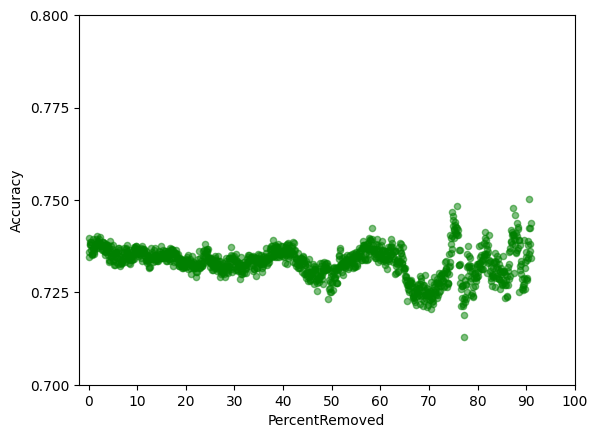

In [ ]:
ds_model__bgn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

# Random Forest

In [ ]:
ds_model_rfn = read_output_files(out_path)
ds_model_rfn_srt = ds_model_rfn.sort_values(by='PercentRemoved')
ds_model_rfn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.748307,0.00
1,2,0.750398,0.07
2,2,0.747318,0.14
3,2,0.749429,0.21
4,2,0.749601,0.28
...,...,...,...
1296,2,0.752048,90.72
1297,2,0.754689,90.79
1298,2,0.752834,90.86
1299,2,0.750952,90.93


In [ ]:
hg_acc_rf = ds_model_rfn_srt['Accuracy'].max()
lw_acc_rf = ds_model_rfn_srt['Accuracy'].min()
base_acc_rf = ds_model_rfn_srt['Accuracy'].iloc[0]


acc_hl_rf = hg_acc_rf - lw_acc_rf
acc_hb_rf = hg_acc_rf - base_acc_rf
acc_lb_rf = lw_acc_rf - base_acc_rf

print("Difference between highest and lowest accuracy:", acc_hl_rf)
print("Difference between highest and base accuracy:", acc_hb_rf)
print("Difference between lowest and base accuracy:", acc_lb_rf)

rfkeyval = {
    'high_acc': [hg_acc_rf],
    'low_acc': [lw_acc_rf],
    'base_acc': [base_acc_rf],
    'diff_high_low': [acc_hl_rf],
    'diff_high_base': [acc_hb_rf],
    'diff_low_base': [acc_lb_rf]
}

dataf_rf = pd.DataFrame(rfkeyval)
dataf_rf

Difference between highest and lowest accuracy: 0.030324429777236817
Difference between highest and base accuracy: 0.018414202304142813
Difference between lowest and base accuracy: -0.011910227473094004


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.766721,0.736397,0.748307,0.030324,0.018414,-0.01191


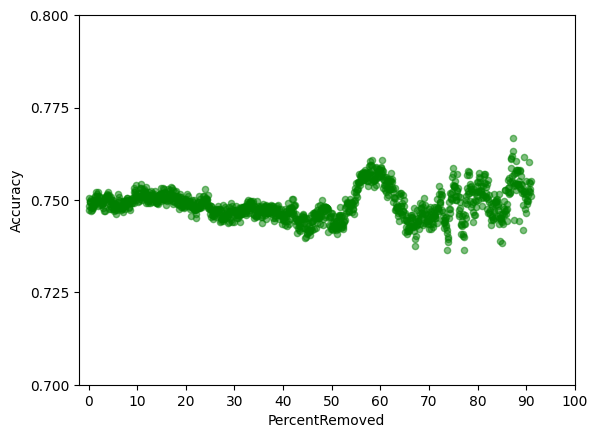

In [ ]:
ds_model_rfn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()